Please add your personal information at the first cell by "Markdown" selection.
# 2024-Spring DS HW4
## Due: 2024/05/24 23:59
### 請自行注意期限，不接受補繳
## 檔名請更為HW3_${學號}.ipynb 例如:HW4_111598084.ipynb


### Problem1:
- 請參考Lab9，比較並繪製金磚五國（BRICS）Covid19疫情的確診趨勢圖(至少要畫出Trajectory圖)，分別為巴西、俄羅斯、印度、中華人民共和國、南非。


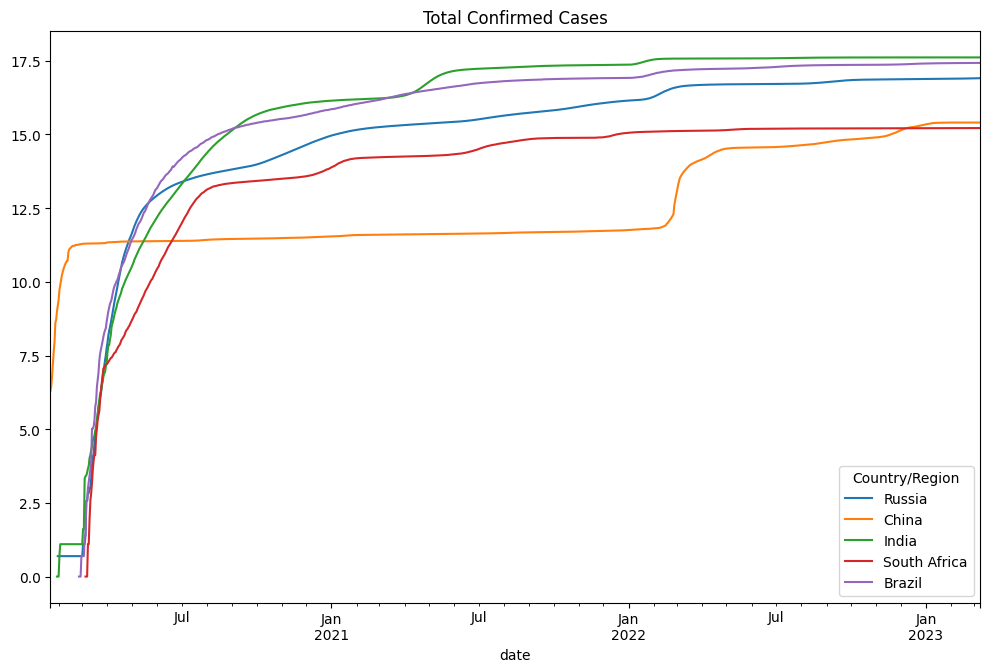

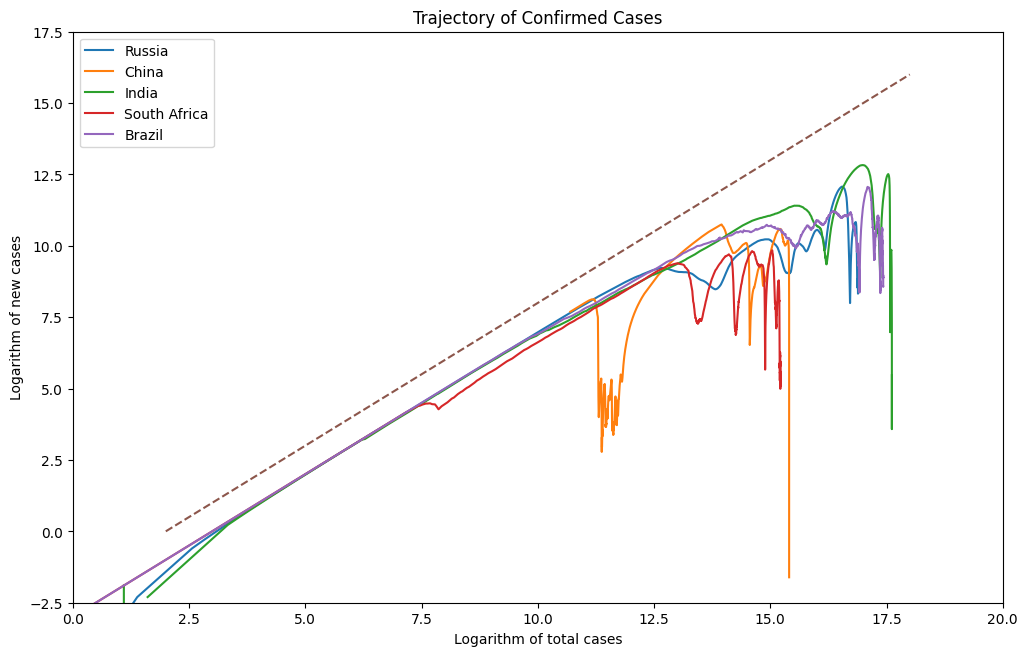

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Get File

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed_cases = pd.read_csv(url)

# Data Processing

confirmed_cases.drop(columns=['Lat','Long','Province/State'],inplace = True)
confirmed_cases = confirmed_cases.groupby('Country/Region').sum()
confirmed_cases.columns = pd.to_datetime(confirmed_cases.columns,format = 'mixed')
confirmed_cases = confirmed_cases.transpose()
confirmed_cases.index.name = 'date'

#Get Countries Data
contries = ['Russia','China','India','South Africa','Brazil']
confirmed_cases = confirmed_cases[contries]

confirmed_diff_cases = confirmed_cases.diff()

figsize = (12, 12 * 2 / (1 + 5**0.5))
confirmed_cases.apply(np.log).plot(
    figsize=figsize,
    title='Total Confirmed Cases',
)
confirmed_diff_cases = confirmed_diff_cases.rolling(window=20, win_type=None).mean()
plt.figure(figsize=figsize)
plt.title('Trajectory of Confirmed Cases')
plt.xlabel('Logarithm of total cases')
plt.ylabel('Logarithm of new cases')
plt.xlim((0, 20))
plt.ylim((-2.5, 17.5))
for col in confirmed_cases.columns:
    plt.plot(
        confirmed_cases[col].apply(np.log), 
        confirmed_diff_cases[col].apply(np.log),
        label=col,
    )
plt.plot([2,18], [0, 16], linestyle='--')
plt.legend()

### Problem2: 手寫過程在紙上後拍照用Markdown附上
- 如何使用Naïve Bayes classifier技術判斷下列表格的第八份文件(Test Document)是一份高興的文件或是不高興的文件? 
- 指定為高興(h)文件或是不高興(~h)文件的機率各自為何?

| RID | type | text | 
| :-: | :-: | :-: | 
| D1 | Happy(h) | love happy happy joy smile angry |
| D2 | Happy(h) | cry happy joy love happy |
| D3 | Happy(h) | good happy love cry love |
| D4 | Happy(h) | pain love happy joy love |
| D5 | Unhappy(~h) | love angry pain pain |
| D6 | Unhappy(~h) | love angry pain |
| D7 | Unhappy(~h) | angry angry pain |
| D8 | ?? | cry love angry pain |
